<div align="center">
    
# Asset Finance Risk Assessment Model
## Binary Classification
<p><b>Logistic Regression</b></p>
<p><b>Random Forest</b></p>
<p><b>Gradient Boosting</b></p>
<p><b>XGBoost</b></p>

> Author: [Mithamo Beth](https://github.com/Mythamor) 
</div>

## Preprocessing Pipeline (Pipe the final model)

In [5]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import duckdb
import sweetviz as sv

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the layout
sns.set_style("darkgrid");

# Set the color palette
sns.set_palette("Set2");

# Set the default figsize
plt.rcParams["figure.figsize"] = (6, 4);

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
new_df = pd.read_csv('../data/new_df.csv', index_col=0)
new_df.head()

,Disbursed_amount,Asset_cost,Ltv,Manufacturer_id,Employment_type,State_id,Aadhar_flag,Voterid_flag,Perform_cns_score,Pri_no_of_accts,Pri_active_accts,New_accts_in_last_six_months,No_of_inquiries,Loan_default,Average_loan_tenure,Credit_history_length_months,Perform_cns_score_description,Age
0,50578,58400,89.55,45,Salaried,6,1,0,0,0,0,0,0,0,0.00,0.00,No Bureau History Available,34
1,47145,65550,73.23,45,Self employed,6,1,0,598,1,1,0,0,1,1.92,1.92,I-Medium Risk,33
2,53278,61360,89.63,45,Self employed,6,1,0,0,0,0,0,0,0,0.00,0.00,No Bureau History Available,32
3,57513,66113,88.48,45,Self employed,6,1,0,305,3,0,0,1,1,0.67,1.25,L-Very High Risk,24
4,52378,60300,88.39,45,Self employed,6,1,0,0,0,0,0,1,1,0.00,0.00,No Bureau History Available,40


In [7]:
new_df.Perform_cns_score_description

0         No Bureau History Available
1                       I-Medium Risk
2         No Bureau History Available
3                    L-Very High Risk
4         No Bureau History Available
                     ...             
233149                D-Very Low Risk
233150                A-Very Low Risk
233151    No Bureau History Available
233152    No Bureau History Available
233153    No Bureau History Available
Name: Perform_cns_score_description, Length: 233154, dtype: object

In [50]:
# Split the target and predictor variables
X = df_1.drop(['Loan_default'], axis=1)
y = df_1['Loan_default']

# Perfrom a train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape, '\n X_test:',X_test.shape)
print('y_train:', y_train.shape, '\n y_test:',y_test.shape)

X_train shape: (152469, 24)
y_train shape: (152469, 2)
X_test shape: (65344, 24)
y_test shape: (65344, 2)


In [51]:
y_train.head()

        Loan_default
207280             0
148942             0
200970             0
207969             0
47539              1


In [52]:
X_train.head()

,Disbursed_amount,Asset_cost,Ltv,Manufacturer_id,State_id,Aadhar_flag,Voterid_flag,Perform_cns_score,Pri_no_of_accts,Pri_active_accts,...,Age,Employment_type_Salaried,Employment_type_Self employed,No_of_inquiries_1,No_of_inquiries_2,No_of_inquiries_3+,Cns_score_category_Low_risk,Cns_score_category_Medium_high_risk,Cns_score_category_Medium_risk,Cns_score_category_Very_high_risk
207280,0.498281,0.282262,0.928230,0.41,0.333333,1.0,0.0,0.701124,0.107143,0.1,...,0.235294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148942,0.434717,0.227234,0.923841,0.41,0.380952,0.0,1.0,0.794382,0.250000,0.3,...,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
200970,0.359349,0.241987,0.760682,0.41,0.666667,1.0,0.0,0.000000,0.000000,0.0,...,0.235294,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
207969,0.427650,0.277087,0.811669,0.00,0.333333,1.0,0.0,0.000000,0.000000,0.0,...,0.431373,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47539,0.307684,0.198290,0.729444,0.41,0.238095,1.0,1.0,0.020225,0.107143,0.0,...,0.549020,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Ensure these are correct numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64'])
category_cols = X_train.select_dtypes(include=['object', 'category'])
nums =  numeric_cols.columns
cats = category_cols.columns
print(f'Numeric Columns:\n {nums}\n\n')
print(f'Categorical Columns\n :{cats}\n\n')

In [61]:
nums =  numeric_cols.columns
nums

Index(['Disbursed_amount', 'Asset_cost', 'Ltv', 'Manufacturer_id', 'State_id',
       'Aadhar_flag', 'Voterid_flag', 'Perform_cns_score', 'Pri_no_of_accts',
       'Pri_active_accts', 'New_accts_in_last_six_months', 'Loan_default',
       'Average_loan_tenure', 'Credit_history_length_months', 'Age'],
      dtype='object')

In [62]:
cats = category_cols.columns
cats

Index(['Employment_type', 'No_of_inquiries', 'Cns_score_category'], dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [71]:
# Data Preprocessing pipeline
# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder())
])

# Combined preprocessed data
trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, nums),
    ('categorical', categorical_pipeline, cats)
], remainder="passthrough")

# Preprocesing pipeline
preprocessing_pipe = Pipeline(steps=[
                    ('col_trans', trans)
                    ])

# Classification Modeling

If capturing all actual loan defaults is more important, prioritize recall. Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive instances (loan defaults) out of all actual positive instances. Recall focuses on the ability of the model to capture all positive instances, which is crucial in identifying all actual loan defaults and minimizing false negatives.

In [64]:
# Classification modeling libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score\
,roc_curve, auc, precision_score, RocCurveDisplay

In [65]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, roc_curve, auc, 
                             ConfusionMatrixDisplay, RocCurveDisplay)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function for model evaluation
def eval_model(model, X_test, y_test, n_classes=None):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds, average='weighted')
    precision = precision_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    con_max = confusion_matrix(y_test, preds)
    
    if n_classes is None:
        n_classes = model.classes_
    
    # Display the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(con_max, display_labels=n_classes)
    disp.plot(cmap=plt.cm.magma)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    
    # ROC Curve for multiclass (One-vs-Rest)
    plt.figure(figsize=(10, 8))
    for i in range(len(n_classes)):
        fpr, tpr, _ = roc_curve(y_test, probs[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve for {n_classes[i]} (area = {roc_auc:.2f})')

    # Plot the chance level line
    plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = preds
    results_df['predicted_probabilities'] = list(probs)

    # Plot the distribution of probabilities for the estimated classes
    for i in range(len(n_classes)):
        sns.kdeplot(results_df[results_df['true_class'] == n_classes[i]]['predicted_probabilities'][:, i],
                    label=f"{n_classes[i]}", fill=True)

    plt.title('Probability Distributions for Each Class')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # See the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

### Class Imbalance

In [72]:
# Class imbalance 
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Previous original class distribution
print('Original class distribution: \n')
print(new_df['Loan_default'].value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Loan_default
0    170527
1     47286
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 



ValueError: Data must be 1-dimensional, got ndarray of shape (238822, 1) instead

LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.5: 0.6428340659584659
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.7: 0.6425349403504097
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for even: 0.641066998158825
-------------------------------------------------------------------------------------


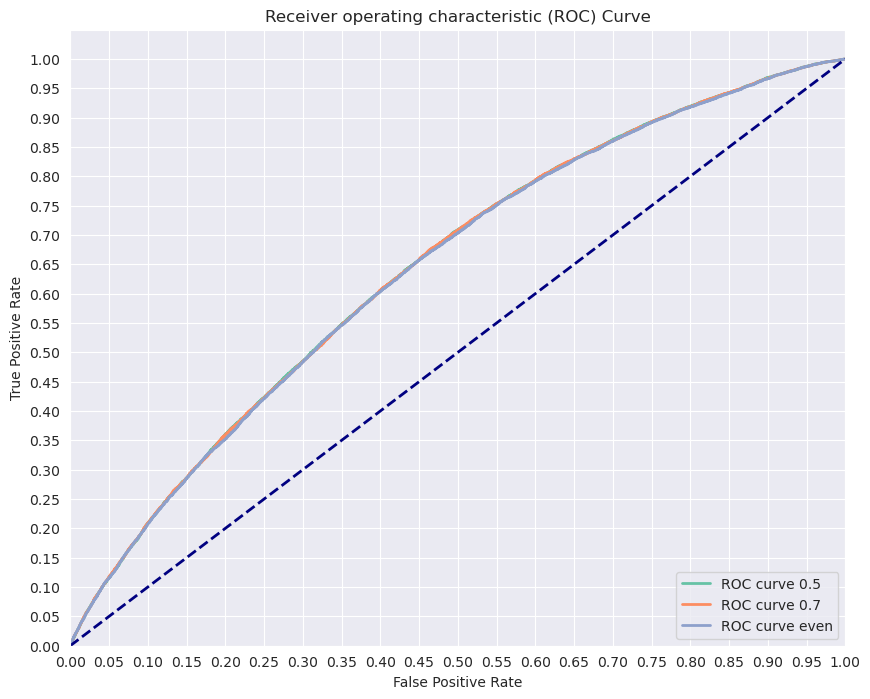

In [109]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.5, 0.7, 1]
names = ['0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The best performing model is when our samples are balanced at  0.5. The smote model is not performing any better than the ordinary regression model though.

## Target Variable

In [73]:
y_train.value_counts(normalize=True)

Loan_default
0               0.783182
1               0.216818
Name: proportion, dtype: float64

## Multiclass Claasification Models

### Logistic Regression

In [74]:
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)
# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

NameError: name 'show_loan_distrib' is not defined

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate and fit the model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
preds = log_reg.predict(X_test)

# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {log_reg.score(X_train, y_train)}')
print(f'Testing Accuracy : {log_reg.score(X_test, y_test)}')

# Evaluate the model
print(classification_report(y_test, preds))

Training Accuracy: 0.7830116285933534
Testing Accuracy : 0.7821376101860921
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     51116
           1       0.44      0.00      0.00     14228

    accuracy                           0.78     65344
   macro avg       0.61      0.50      0.44     65344
weighted avg       0.71      0.78      0.69     65344



### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
preds = rfc.predict(X_test)

# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {rfc.score(X_train, y_train)}')
print(f'Testing Accuracy : {rfc.score(X_test, y_test)}')

# Evaluate the model
print(classification_report(y_test, preds))


Training Accuracy: 0.9994293922043169
Testing Accuracy : 0.7730319539666993
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     51116
           1       0.35      0.05      0.09     14228

    accuracy                           0.77     65344
   macro avg       0.57      0.51      0.48     65344
weighted avg       0.69      0.77      0.70     65344



In [77]:
# Hypertune Random Forest classifier
rfc_1 = RandomForestClassifier(
                        n_estimators=10,
                        criterion='gini',
                        min_samples_split=5,
                        min_samples_leaf=3,
                        max_depth=10, 
                        class_weight= "balanced")

# Fit the clasifier
rfc_1.fit(X_train, y_train) 

# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {rfc_1.score(X_train, y_train)}')
print(f'Testing Accuracy : {rfc_1.score(X_test, y_test)}')

# Evaluate the model
print(classification_report(y_test, preds))

Training Accuracy: 0.983819661701723
Testing Accuracy : 0.7571008814887366
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     51116
           1       0.35      0.05      0.09     14228

    accuracy                           0.77     65344
   macro avg       0.57      0.51      0.48     65344
weighted avg       0.69      0.77      0.70     65344



### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate and fit the model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
preds = gbc.predict(X_test)

# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {gbc.score(X_train, y_train)}')
print(f'Testing Accuracy : {gbc.score(X_test, y_test)}')

# Evaluate the model
print(classification_report(y_test, preds))


Training Accuracy: 0.7832608595845713
Testing Accuracy : 0.782351860920666
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     51116
           1       0.69      0.00      0.00     14228

    accuracy                           0.78     65344
   macro avg       0.73      0.50      0.44     65344
weighted avg       0.76      0.78      0.69     65344



### XGBoost

####  Encode the target variable

In [28]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [82]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Instantiate and fit the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

x_train = xgb_model.predict(X_train)
preds = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, x_train)
test_accuracy = accuracy_score(y_test, preds)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy : {test_accuracy}')

# Evaluate the model
print(classification_report(y_test, preds))


Training Accuracy: 0.7914002190609238
Testing Accuracy : 0.7809286238981391
              precision    recall  f1-score   support

           0       0.78      0.99      0.88     51116
           1       0.44      0.02      0.04     14228

    accuracy                           0.78     65344
   macro avg       0.61      0.51      0.46     65344
weighted avg       0.71      0.78      0.69     65344



In [84]:
from imblearn.pipeline import Pipeline

rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {rf_clf.score(X_train, y_train)}')
print(f'Testing Accuracy : {rf_clf.score(X_test, y_test)}')

# Evaluate the model
print(classification_report(y_test, preds))


Training Accuracy: 0.9994425096249073
Testing Accuracy : 0.7297380019588638
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     51116
           1       0.31      0.20      0.24     14228

    accuracy                           0.73     65344
   macro avg       0.56      0.54      0.54     65344
weighted avg       0.69      0.73      0.71     65344



<Figure size 800x600 with 0 Axes>

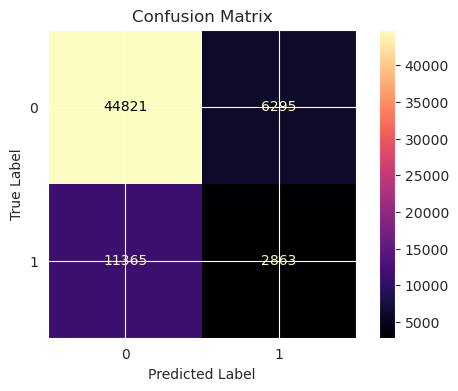



Accuracy:  0.7297380019588638
Precision:  0.6920991977404752
Recall:  0.7297380019588638
F1:  0.706827006516223


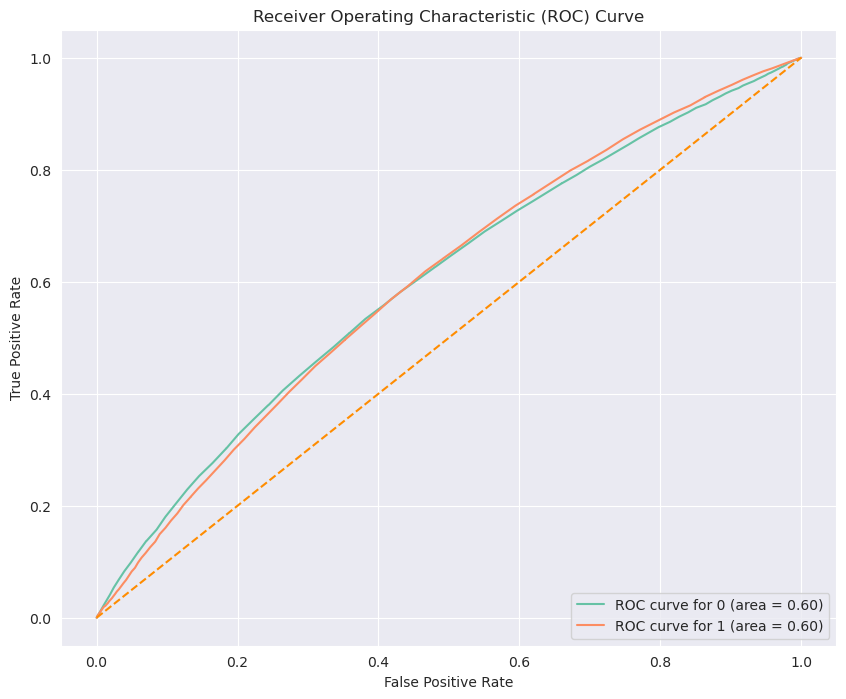

KeyError: 'key of type tuple not found and not a MultiIndex'

In [85]:
eval_model(rf_clf, X_test, y_test)

Training Accuracy: 78.34%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 10}


<Figure size 800x600 with 0 Axes>

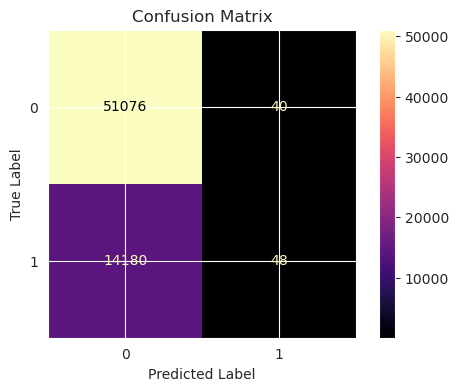



Accuracy:  0.7823824681684622
Precision:  0.7310437280192839
Recall:  0.7823824681684622
F1:  0.6881324052852943


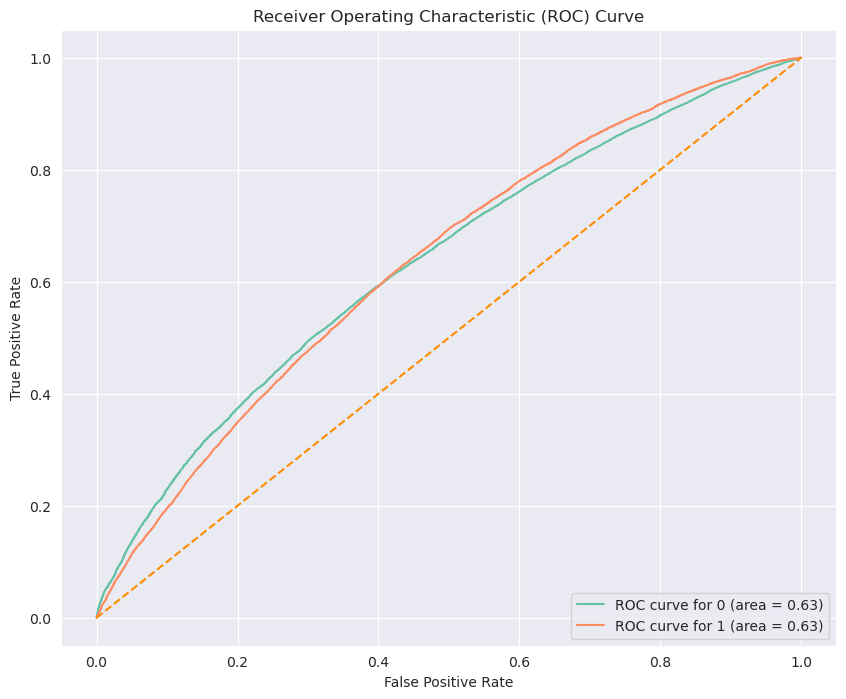

KeyError: 'key of type tuple not found and not a MultiIndex'

In [83]:
# RandomForest GridSearchCV
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Instatiate the clasifier
rf_clf = RandomForestClassifier()

# Grid Search
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)

# Fit the model
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

eval_model(rf_grid_search, X_test, y_test)

In [174]:
# Feature Importance
feature_importance = rfc.feature_importances_

# Create a DataFrame to associate feature names with coefficients
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

coefficients_df = coefficients_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame with ranked coefficients
selected = coefficients_df['Feature'].iloc[:30].to_list()
selected

['Disbursal_month',
 'Ltv',
 'Disbursed_amount',
 'Pri_active_accts',
 'New_accts_in_last_six_months',
 'Pri_no_of_accts',
 'Delinquent_accts_in_last_six_months',
 'Pri_overdue_accts',
 'Cns_score_category_Low_risk',
 'Age',
 'State_id_13',
 'Disbursed_cats_30k - 45k',
 'Pri_disbursed_amount',
 'Pri_current_balance',
 'Credit_history_length_months',
 '_average_credit',
 'CNS_score_bins_(750, 900]',
 'Average_loan_tenure',
 'Manufacturer_id_86',
 'Asset_cost',
 'No_of_inquiries_1',
 'Voterid_flag_1',
 'Manufacturer_id_48',
 'Aadhar_flag_1',
 'Disbursed_cats_60k - 75k',
 'State_id_3',
 'Employment_type_Self employed',
 'Employment_type_Salaried',
 'Cns_score_category_No_history',
 'CNS_score_bins_(700, 750]']

In [175]:
# The logloss of the RFC
from sklearn.metrics import log_loss
log_loss(y_test, rfc.predict_proba(X_test)[:, 1])

0.6539514606690375

> The rfc model, has still failed to atch up to the gostic model. Let's explore more ensemble methods before concluding.

## AdaBoost Classifier & GradientBoosting Classifier

Training Metrics
Model: Train AdaBoost
Accuracy: 0.5267739238468812
F1-Score: 0.6736344628384205

Testing Metrics
Model:  Test AdaBoost
Accuracy: 0.26730818672641127
F1-Score: 0.35900649058543793



<Figure size 800x600 with 0 Axes>

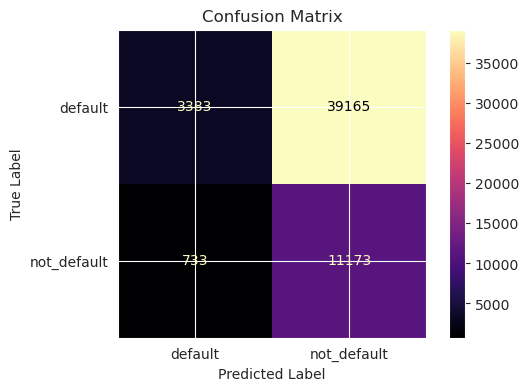



Accuracy:  0.26730818672641127
Precision:  0.22195955341888832
Recall:  0.9384344028221066
F1:  0.35900649058543793
AUC:  0.4651569971798613


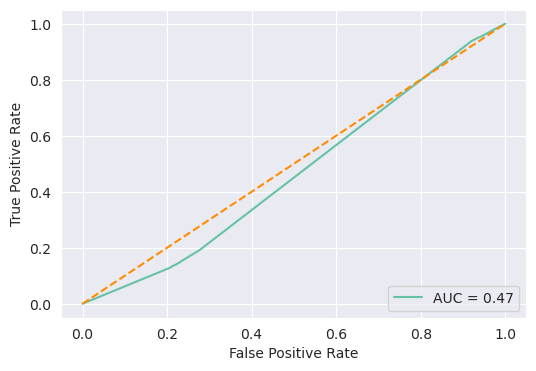

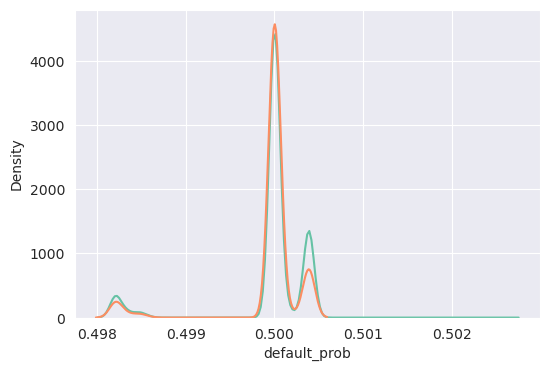

true_class  predicted_class
0           1                  0.920490
            0                  0.079510
1           1                  0.938434
            0                  0.061566
Name: predicted_class, dtype: float64


In [176]:
# Instantiate an AdaBoostClassifier
adaboost_clf =AdaBoostClassifier(n_estimators=100, learning_rate=2, random_state=0)

# Fit AdaBoostClassifier
adaboost_clf.fit(X_train_resampled, y_train_resampled)

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train_resampled)
adaboost_test_preds = adaboost_clf.predict(X_test)

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    

# Adaboost Model Evaluation   
print("Training Metrics")
display_acc_and_f1_score(y_train_resampled, adaboost_train_preds, model_name='Train AdaBoost')
print("")

print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name=' Test AdaBoost')
print("")

eval_model(adaboost_clf, X_test, y_test)

> Adaboosting performed very poorly on the test data and classifying the non_default loans

Model: Train Gradient Boosted Trees
Accuracy: 0.612510646277905
F1-Score: 0.6387572617508332

Model:  Test Gradient Boosted Trees
Accuracy: 0.5600874132295148
F1-Score: 0.38644571370027914



<Figure size 800x600 with 0 Axes>

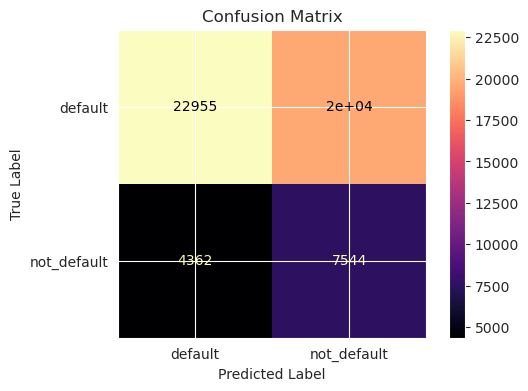



Accuracy:  0.5600874132295148
Precision:  0.27799683089508787
Recall:  0.6336301024693431
F1:  0.38644571370027914
AUC:  0.6161371251798011


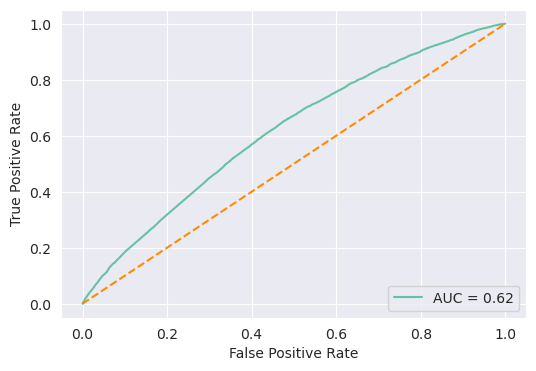

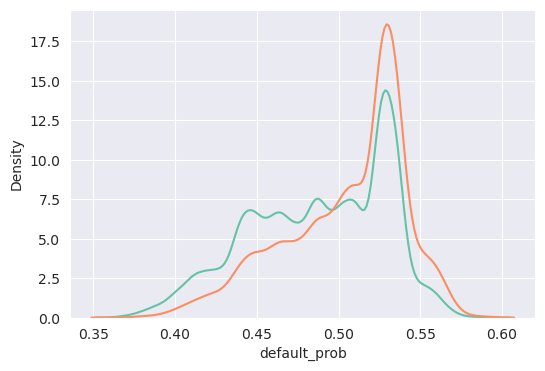

true_class  predicted_class
0           0                  0.539508
            1                  0.460492
1           1                  0.633630
            0                  0.366370
Name: predicted_class, dtype: float64


In [197]:
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(learning_rate=0.1,
                                    n_estimators=10,
                                    random_state=42,
                                    min_samples_split=3,
                                    min_samples_leaf=2,
                                    max_depth = 5,
                                    max_features=5,
                                    max_leaf_nodes=5)
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train_resampled, y_train_resampled)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(X_test)

# Gradient Boosting Evaluation
display_acc_and_f1_score(y_train_resampled, gbt_clf_train_preds, model_name='Train Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name=' Test Gradient Boosted Trees')
print()
eval_model(gbt_clf, X_test, y_test)

> This model may be very good at predicting loan deafults, but it fails miserably on all other metrics.
> 92% of our non_defaults are classified as default. This could lead to business loss, due to the poor performance of the model, to accurately classify non_defaults.

In [ ]:
# Gradient Boosting GridSearch
from sklearn.metrics import make_scorer
# Instantiate the model
gbc = GradientBoostingClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_samples_leaf': [1, 3, 6],
    'min_samples_split': [2, 3, 6],
    'max_features': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0]
}

scorer = make_scorer(roc_auc)
# GridSearhCV
grid_gbc = GridSearchCV(gbc, param_grid, scoring=scorer, cv=3, n_jobs=1)
grid_gbc.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_gbc.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_probs = grid_gbc.predict_proba(X_train_resampled)[:, 1]
test_probs = grid_gbc.predict_proba(X_test)[:, 1]
training_auc = roc_auc_score(y_train_resampled, training_probs)
test_auc = roc_auc_score(y_test, test_probs)

print('')
print('Training AUC-ROC: {:.4}'.format(training_auc))
print('Validation AUC-ROC: {:.4}'.format(test_auc))

eval_model(grid_gbc, X_test, y_test)

## XGBoost Classifier

In [ ]:
# Import XGBoosting
from xgboost import XGBClassifier

In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb = XGBClassifier(eta=lr)
    xgb.fit(X_train_resampled, y_train_resampled)
    train_XG.append(xgb.score(X_train_resampled, y_train_resampled))
    train_XG.append(xgb.score(X_test, y_test))

In [ ]:
# Instantiate the model
xgb = XGBClassifier()

# Parameter Grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

# GridSearhCV
grid_xgb = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_
-----------------------------
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
      
eval_model(grid_xgb, X_test, y_test)

## Model Deployment

For now we will settle on the 2nd logistic model, that had a fair balance of all the metrics, the highest recall without compromising on the other metrics.

* model.pkl (a pickled model file)
* main.py (a Python file defining the function)
* requirements.txt (a requirements file)

In [189]:
# Create a copy of the dataframe
df_copy = df.copy()

# Split the target and predictor variables
X2 = df_copy.drop(['Loan_default'], axis=1)
y2 = df_copy['Loan_default']

In [191]:
# Perfrom a train test split
X_train2 ,X_test2 ,y_train2 ,y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train2.shape, '\n X_test:',X_test2.shape)

X_train: (163359, 25) 
 X_test: (54454, 25)


Training Accuracy: 0.583041032327573
Testing Accuracy : 0.5801043082234547


<Figure size 800x600 with 0 Axes>

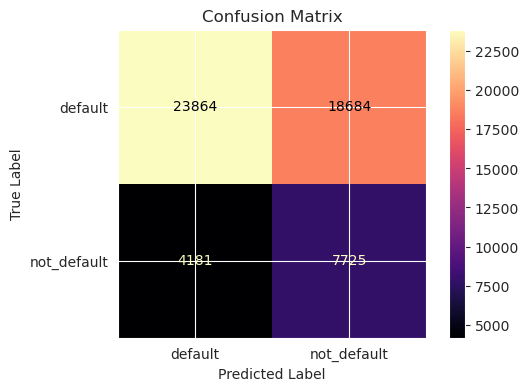



Accuracy:  0.5801043082234547
Precision:  0.29251391571055324
Recall:  0.6488325214177726
F1:  0.40323633041889606
AUC:  0.6447030670321992


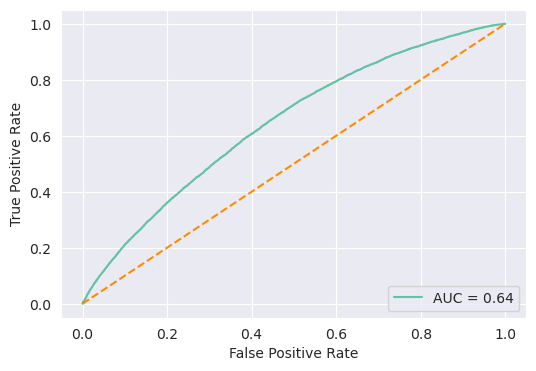

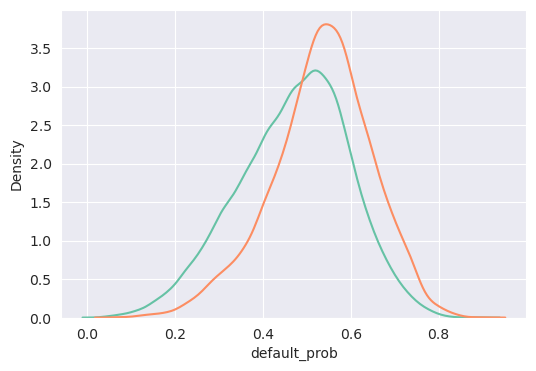

true_class  predicted_class
0           0                  0.560872
            1                  0.439128
1           1                  0.648833
            0                  0.351167
Name: predicted_class, dtype: float64


In [204]:
# Data Preprocessing pipeline
# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('ss', MinMaxScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False))
])

# Combined preprocessed data
trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, nums),
    ('categorical', categorical_pipeline, cats)
], remainder="passthrough")

# Logistic model
log_model2 = LogisticRegression(fit_intercept=True, 
                               C=1e12, 
                               solver='liblinear',
                               max_iter=300, 
                               penalty='l1',
                               class_weight="balanced")
# Pipe the model
log_pipe = Pipeline(steps=[
        ("col_trans", trans),
        ("log_model2", log_model2)])

# Fit the training data
log_pipe.fit(X_train2, y_train2)
    
# Score the train and test data for model performance accuracy
print(f'Training Accuracy: {log_pipe.score(X_train2, y_train2)}')
print(f'Testing Accuracy : {log_pipe.score(X_test2, y_test2)}')

# Evaluate the model
eval_model(log_pipe, X_test2, y_test2)

In [199]:
# Assuming you have 'X_train' as your feature matrix and 'nums' and 'cats' as your lists of numerical and categorical columns

# Fit and transform the data using the preprocessing_pipe
X_preprocessed = preprocessing_pipe.fit_transform(X_train2)

# Get the column names from the transformed data
transformed_feature_names = []

# Get numerical feature names from the standard scaler
numerical_feature_names = X_train2[nums].columns
transformed_feature_names.extend(numerical_feature_names)

# Get one-hot encoded categorical feature names from the OneHotEncoder
categorical_encoder = preprocessing_pipe.named_steps['col_trans'].transformers_[1][1].named_steps['ohe']
categorical_feature_names = categorical_encoder.get_feature_names_out(X_train2[cats].columns)
transformed_feature_names.extend(categorical_feature_names)

# If you have remaining columns that were not transformed, add them to the list
remaining_columns = [col for col in X_train2.columns if col not in numerical_feature_names and col not in categorical_feature_names]
transformed_feature_names.extend(remaining_columns)

# Print the preprocessed column names
print(transformed_feature_names)

['Disbursed_amount', 'Asset_cost', 'Ltv', 'Pri_no_of_accts', 'Pri_active_accts', 'Pri_overdue_accts', 'Pri_current_balance', 'Pri_disbursed_amount', 'New_accts_in_last_six_months', 'Delinquent_accts_in_last_six_months', 'Average_loan_tenure', 'Credit_history_length_months', '_average_credit', 'Age', 'Disbursal_month', 'Employment_type_Salaried', 'Employment_type_Self employed', 'No_of_inquiries_1', 'No_of_inquiries_2', 'No_of_inquiries_3+', 'Cns_score_category_Low_risk', 'Cns_score_category_Medium_risk', 'Cns_score_category_No_history', 'Cns_score_category_Not_scored', 'CNS_score_bins_(0, 300]', 'CNS_score_bins_(300, 550]', 'CNS_score_bins_(550, 700]', 'CNS_score_bins_(700, 750]', 'CNS_score_bins_(750, 900]', 'Disbursed_cats_30k - 45k', 'Disbursed_cats_45k - 60k', 'Disbursed_cats_60k - 75k', 'Disbursed_cats_75k - 150k', 'Manufacturer_id_48', 'Manufacturer_id_49', 'Manufacturer_id_51', 'Manufacturer_id_67', 'Manufacturer_id_86', 'Manufacturer_id_120', 'Manufacturer_id_145', 'State_id_2'

In [201]:
# Verify the prediction with an example
print(X_train2.iloc[0])
print(y_train2.iloc[0])

Disbursed_amount                             50303
Asset_cost                                   60543
Ltv                                          85.89
Manufacturer_id                                 86
Employment_type                           Salaried
State_id                                         6
Aadhar_flag                                      1
Voterid_flag                                     0
Passport_flag                                    0
Pri_no_of_accts                                  1
Pri_active_accts                                 1
Pri_overdue_accts                                0
Pri_current_balance                           7500
Pri_disbursed_amount                         15000
New_accts_in_last_six_months                     1
Delinquent_accts_in_last_six_months              0
No_of_inquiries                                  0
Average_loan_tenure                              3
Credit_history_length_months                     3
Cns_score_category             

In [203]:
# Our model is accurate in this instance
log_pipe.predict(X_train2)[0]

0

In [2]:
# Requirements.txt
import sklearn
import joblib
print(sklearn.__version__)
print(joblib.__version__)

1.5.1
1.4.2


In [3]:
with open("model.pkl", "wb") as f:
    joblib.dump(log_pipe, f)

NameError: name 'log_pipe' is not defined

In [21]:
# Assuming 'log_reg' is your fitted Logistic Regression model
class CallableModel:
    def __init__(self, model):
        self.model = model

    def __call__(self, X):
        return self.model.predict_proba(X)

# Wrap your logistic regression model
callable_log_reg = CallableModel(log_reg)

# Create the SHAP explainer
explainer = shap.KernelExplainer(callable_log_reg, X_train)  # Use X_train for background data

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for the first instance in the test set
shap.summary_plot(shap_values, X_test)

Using 152469 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/65344 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Model function

In [ ]:
import numpy as np

def predict_credit_limit_and_score(user_data):
    """
    Predicts both the credit limit (regression) and the credit score category (classification).
    
    Parameters:
    - user_data: A dictionary or Pandas Series containing the user's input data for the prediction.
    
    Returns:
    - result: A dictionary with predicted credit limit and credit score category.
    """
    
    # 1. Preprocess the input data as required by your models
    # Assume you have a function `preprocess_input` that applies necessary transformations
    processed_data = preprocess_input(user_data)
    
    # 2. Predict the credit limit using the trained regressor model
    credit_limit = credit_limit_model.predict(processed_data)
    
    # 3. Predict the credit score category using the trained classifier model
    credit_score_class = credit_score_model.predict(processed_data)
    
    # 4. Map the numeric class prediction to a credit score category label
    score_mapping = {0: 'Very Low', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
    credit_score_category = score_mapping.get(credit_score_class[0], 'Unknown')
    
    # 5. Return both the credit limit and the score category as the result
    result = {
        'credit_limit': credit_limit[0],  # Assuming the model returns an array
        'credit_score_category': credit_score_category
    }
    
    return result


In [336]:
data_1 = [200000, 150000, 75, 6,
       5, 0, 50000,
       120000, 0,
       0, 18,
       0, 35, 7,
       0, 1,
       1, 0, 0,
       0, 1,
       1, 0,
       0, 0,
       0,0,
       1,1,0,
       0,0,0,
       0,0,0,
       1,0,0,0,0,
       0,0,0,0,0,
       0,0,0,0,
       0,0,0,0,
       0,0,1,1]
# List of values for prediction
data_1 = [800000, 750000, 50, 2, 5, 5, 50000, 150000, 0, 0, 18, 0, 45, 7, 0, 1, 1, 0, 0, 0,
          0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Create a DataFrame using the provided values
data_1_df = pd.DataFrame([data_1], columns=X_train.columns)

# Make the prediction using the trained RFC model
prediction = rfc.predict(data_1_df)

print("Predicted class:", prediction)

Predicted class: [0]


In [338]:
# Convert the Pandas Series to a NumPy array and then reshape it
data_point = X_test.iloc[0].values.reshape(1, -1)

# Make the prediction
prediction = rfc.predict(data_point)

print("Predicted class:", prediction)

Predicted class: [0]
